In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import seaborn as sns
import matplotlib.pyplot as plt

Read data from table csv files and 

In [2]:
df1 = pd.read_csv('/content/df_artists.csv')
df2 = pd.read_csv('/content/df_characteristics.csv')
df3 = pd.read_csv('/content/df_genres.csv')
df4 = pd.read_csv('/content/df_songs.csv')

In [3]:
#joined df1 and df2
df = df1.merge(df2, left_on=df1['artist_id'], right_on=df2['song_id'])
df.drop(['key_0'], axis=1, inplace=True)
df

,artist_id,artist_name,song_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Norah Jones,0,157,30,53,-14,11,68,201,94,3,71
1,1,Deep Purple,1,135,79,50,-11,17,81,207,17,7,39
2,2,Gorillaz,2,168,69,66,-9,7,52,341,2,17,69
3,3,Foo Fighters,3,173,96,43,-4,3,37,269,0,4,76
4,4,Bruce Springsteen,4,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,Rare Earth,726,96,39,57,-6,23,32,216,37,3,88
727,727,"Crosby, Stills & Nash",727,91,70,54,-6,10,56,221,5,3,30
728,728,Chuck Berry,728,174,44,64,-14,9,15,154,13,20,68
729,729,The Dave Brubeck Quartet,729,109,41,81,-9,8,50,223,11,4,59


In [4]:
#top 10 popular artist Query
top_popularity = df.sort_values(by='popularity',ascending=False)
top_10_pop = top_popularity[['artist_name', 'popularity']].head(10).reset_index()
top_popularity

,artist_id,artist_name,song_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
726,726,Rare Earth,726,96,39,57,-6,23,32,216,37,3,88
688,688,Venice,688,125,78,78,-4,8,67,204,6,13,88
683,683,Les Poppys,683,95,45,60,-6,11,17,263,16,2,87
687,687,Bonnie Tyler,687,96,65,83,-3,9,93,234,58,8,87
529,529,BAP,529,120,26,42,-7,13,33,270,92,3,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,24,Editors,24,112,74,65,-7,23,52,261,18,3,16
626,626,House Of Pain,626,89,82,53,-6,9,69,200,1,4,16
605,605,Queensrÿche,605,114,44,37,-15,67,45,198,82,8,15
411,411,Don McLean,411,131,83,43,-7,92,71,217,1,3,14


Top Ten Most popular Songs

In [5]:
#top 10 popular artist Query
# joined df4 and df2
top_ten_songs = df4.merge(df2, left_on=df4['song_id'], right_on=df2['song_id'])
top_popular_songs = top_ten_songs.sort_values(by='popularity',ascending=False)
top_10_popular_songs = top_popular_songs[['title', 'popularity']].head(10).reset_index()
top_10_popular_songs

,index,title,popularity
0,1520,Dance Monkey,100
1,667,Memories,98
2,1125,All I Want for Christmas Is You,95
3,1795,bad guy,95
4,753,Believer,88
5,1092,Shallow,88
6,699,Shape of You,87
7,1875,High Hopes,87
8,698,Perfect,87
9,1405,All of Me,86


Number of Songs by Year

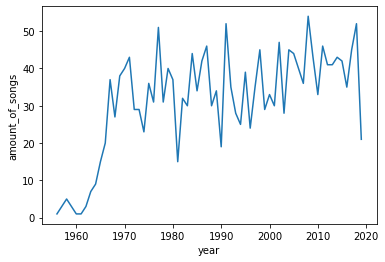

In [6]:
HighestNumberOfSongsByYear = top_ten_songs.groupby('year').count().sort_values(by='title',ascending=True).reset_index()
HighestNumberOfSongsByYear.rename(columns={'title': 'amount_of_songs'},inplace=True)
sns.lineplot(data=HighestNumberOfSongsByYear, x="year", y="amount_of_songs")

HeatMaps/Correclations

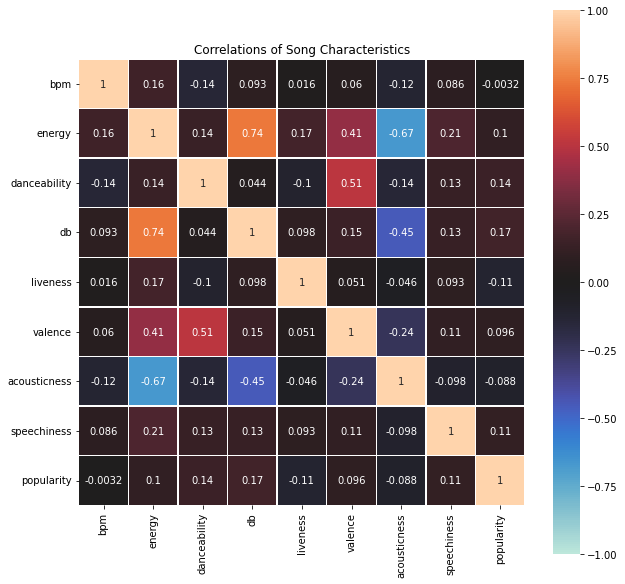

In [7]:
#Heatmap of Joined DataFrame of df2 df_characteristics
data = pd.read_csv('/content/df_characteristics.csv')
data.drop(['song_id'], inplace=True, axis=1)
plt.figure(figsize=(10,10))
heat_map = sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, linewidth=.5,square=True, annot = True)
plt.title('Correlations of Song Characteristics')
plt.show()

Pair-Plot/Correlations between Song Characteristics

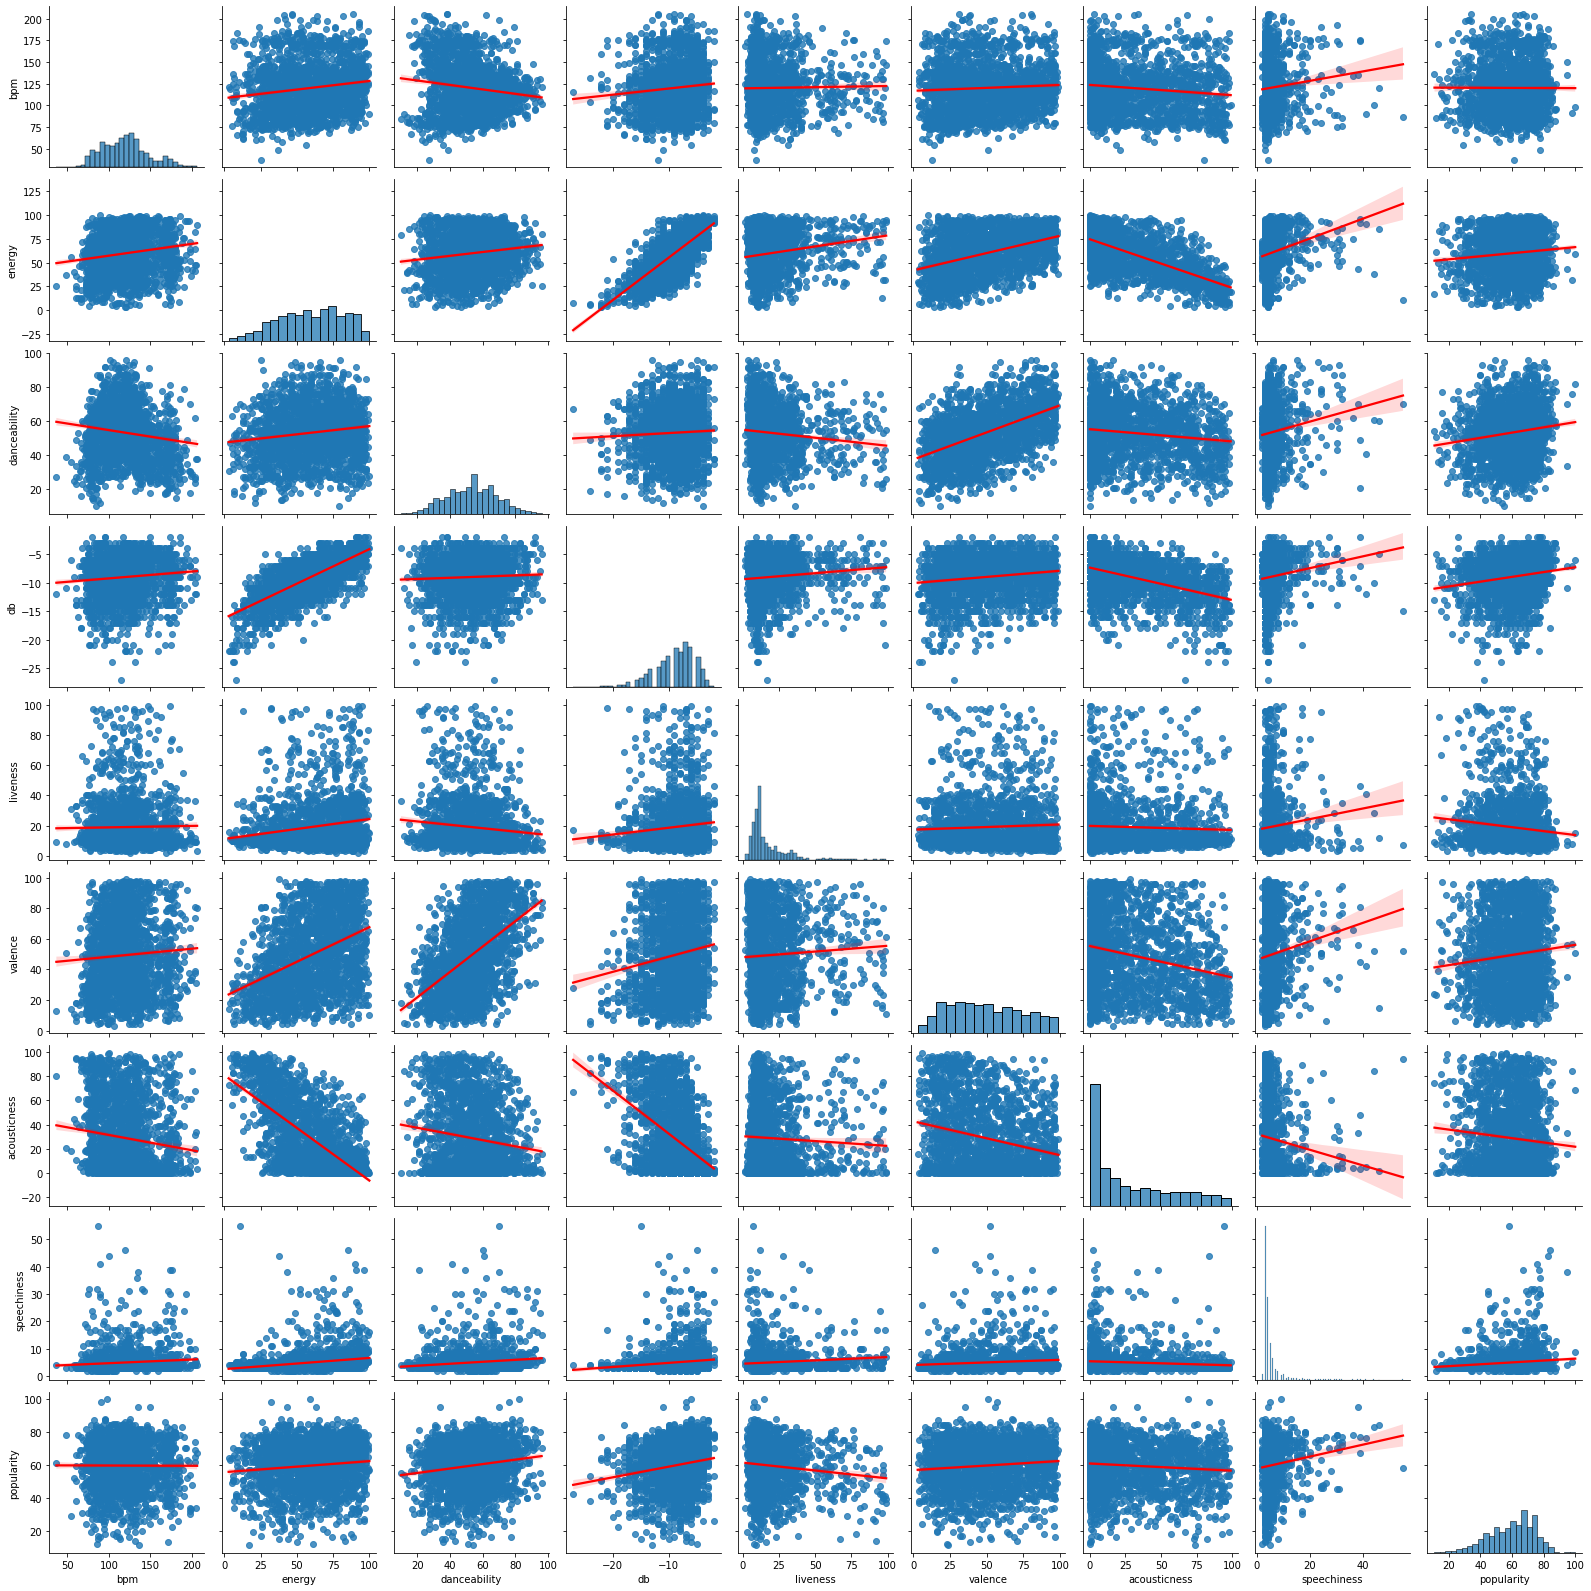

In [8]:
#seaborn pair-plot with red linear regression line
sns.pairplot(data, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()

Kdeplot of Data

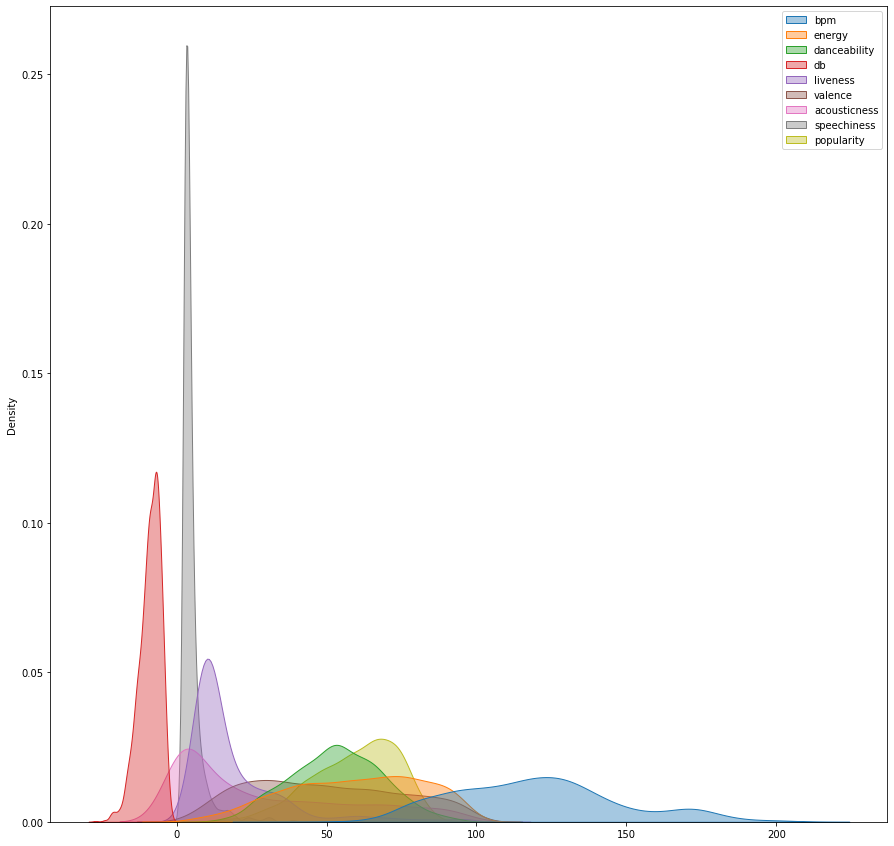

In [9]:
# With transparency
#set size of plot
plt.figure(figsize=(15,15))

sns.kdeplot(data=data, fill=True, common_norm=False, alpha=0.4)
plt.show()